In [1]:
!pip install --upgrade mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import mplfinance as mpf
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import TimeSeriesSplit

In [3]:
table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
table[0]

Symbol              Security             GICS Sector  \
0      MMM                    3M             Industrials   
1      AOS           A. O. Smith             Industrials   
2      ABT                Abbott             Health Care   
3     ABBV                AbbVie             Health Care   
4      ACN             Accenture  Information Technology   
..     ...                   ...                     ...   
498    YUM           Yum! Brands  Consumer Discretionary   
499   ZBRA    Zebra Technologies  Information Technology   
500    ZBH         Zimmer Biomet             Health Care   
501   ZION  Zions Bancorporation              Financials   
502    ZTS                Zoetis             Health Care   

                      GICS Sub-Industry    Headquarters Location  Date added  \
0              Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1                     Building Products     Milwaukee, Wisconsin  2017-07-26   
2                 Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                         Biotechnology  North Chicago, Illinois  2012-12-31   
4        IT Consulting & Other Services          Dublin, Ireland  2011-07-06   
..                                  ...                      ...         ...   
498                         Restaurants     Louisville, Kentucky  1997-10-06   
499  Electronic Equipment & Instruments   Lincolnshire, Illinois  2019-12-23   
500               Health Care Equipment          Warsaw, Indiana  2001-08-07   
501                      Regional Banks     Salt Lake City, Utah  2001-06-22   
502                     Pharmaceuticals   Parsippany, New Jersey  2013-06-21   

         CIK      Founded  
0      66740         1902  
1      91142         1916  
2       1800         1888  
3    1551152  2013 (1888)  
4    1467373         1989  
..       ...          ...  
498  1041061         1997  
499   877212         1969  
500  1136869         1927  
501   109380         1873  
502  1555280         1952  

[503 rows x 8 columns]

In [4]:
data = table[0]

# Convert the date column to datetime format
data['Date added'] = pd.to_datetime(data['Date added'])

# Filter stocks added completely since 2010
stocks_since_2010 = data[data['Date added'].dt.year <= 2010]

# Display the resulting data
stocks_since_2010

Symbol              Security             GICS Sector  \
0      MMM                    3M             Industrials   
2      ABT                Abbott             Health Care   
5     ADBE            Adobe Inc.  Information Technology   
7      AES       AES Corporation               Utilities   
8      AFL                 Aflac              Financials   
..     ...                   ...                     ...   
495   WYNN          Wynn Resorts  Consumer Discretionary   
496    XEL           Xcel Energy               Utilities   
498    YUM           Yum! Brands  Consumer Discretionary   
500    ZBH         Zimmer Biomet             Health Care   
501   ZION  Zions Bancorporation              Financials   

                                GICS Sub-Industry    Headquarters Location  \
0                        Industrial Conglomerates    Saint Paul, Minnesota   
2                           Health Care Equipment  North Chicago, Illinois   
5                            Application Software     San Jose, California   
7    Independent Power Producers & Energy Traders      Arlington, Virginia   
8                         Life & Health Insurance        Columbus, Georgia   
..                                            ...                      ...   
495                              Casinos & Gaming         Paradise, Nevada   
496                               Multi-Utilities   Minneapolis, Minnesota   
498                                   Restaurants     Louisville, Kentucky   
500                         Health Care Equipment          Warsaw, Indiana   
501                                Regional Banks     Salt Lake City, Utah   

    Date added      CIK Founded  
0   1957-03-04    66740    1902  
2   1957-03-04     1800    1888  
5   1997-05-05   796343    1982  
7   1998-10-02   874761    1981  
8   1999-05-28     4977    1955  
..         ...      ...     ...  
495 2008-11-14  1174922    2002  
496 1957-03-04    72903    1909  
498 1997-10-06  1041061    1997  
500 2001-08-07  1136869    1927  
501 2001-06-22   109380    1873  

[299 rows x 8 columns]

In [5]:
# Define the stock ticker symbol
ticker_symbols = stocks_since_2010['Symbol'].unique().tolist()
# Download historical stock data

# Download historical stock data
stock_datas = yf.download(tickers=ticker_symbols, start='2010-01-04', group_by='ticker')

[*********************100%%**********************]  299 of 299 completed

ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2010-01-04 -> 2023-12-25)')


In [6]:
stock_datas

EBAY                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2010-01-04   9.983165  10.092593   9.941077  10.058923   9.265382  22511650   
2010-01-05  10.012626  10.058923   9.890572   9.953704   9.168465  26683193   
2010-01-06   9.945286  10.016835   9.865320   9.890572   9.110313  26368610   
2010-01-07   9.886364   9.886364   9.751684   9.776936   9.005641  25220052   
2010-01-08   9.760101   9.949495   9.722222   9.894781   9.114191  30484080   
...               ...        ...        ...        ...        ...       ...   
2023-12-18  41.529999  42.810001  41.520000  42.520000  42.520000   6687300   
2023-12-19  42.660000  44.270000  42.570000  43.669998  43.669998   7351000   
2023-12-20  43.400002  43.820000  42.830002  42.980000  42.980000   5761900   
2023-12-21  43.330002  43.759998  43.070000  43.730000  43.730000   3238300   
2023-12-22  43.560001  44.070000  43.450001  43.820000  43.820000   3330300   

                   ITW                                      ...         ABT  \
                  Open        High         Low       Close  ...         Low   
Date                                                        ...               
2010-01-04   48.590000   48.939999   48.060001   48.570000  ...   25.870815   
2010-01-05   48.439999   48.580002   48.080002   48.439999  ...   25.789249   
2010-01-06   48.490002   48.490002   48.029999   48.330002  ...   25.837231   
2010-01-07   48.139999   48.689999   48.139999   48.639999  ...   25.942785   
2010-01-08   48.520000   49.150002   48.459999   49.099998  ...   26.235464   
...                ...         ...         ...         ...  ...         ...   
2023-12-18  259.109985  259.109985  256.630005  257.660004  ...  107.160004   
2023-12-19  258.750000  259.220001  257.209991  258.589996  ...  107.430000   
2023-12-20  258.059998  260.709991  256.640015  256.690002  ...  107.300003   
2023-12-21  258.679993  260.649994  257.890015  260.489990  ...  107.180000   
2023-12-22  261.209991  263.230011  261.019989  261.910004  ...  108.500000   

                                                     NUE              \
                 Close   Adj Close    Volume        Open        High   
Date                                                                   
2010-01-04   26.129908   19.138168  10829095   47.380001   48.279999   
2010-01-05   25.918797   18.983547  10562109   47.770000   48.259998   
2010-01-06   26.062737   19.088964  11401417   48.049999   50.099998   
2010-01-07   26.278646   19.247107  12857232   49.290001   49.290001   
2010-01-08   26.412991   19.345501  12148604   49.130001   50.439999   
...                ...         ...       ...         ...         ...   
2023-12-18  108.059998  108.059998   5142800  175.720001  178.169998   
2023-12-19  108.419998  108.419998   4675100  174.779999  178.160004   
2023-12-20  107.400002  107.400002   5666200  176.830002  179.289993   
2023-12-21  108.480003  108.480003   3555600  177.449997  178.179993   
2023-12-22  109.029999  109.029999   2565700  177.000000  178.910004   

                                                         
                   Low       Close   Adj Close   Volume  
Date                                                     
2010-01-04   47.320000   47.790001   32.154140  4923600  
2010-01-05   47.389999   48.119999   32.376175  3610000  
2010-01-06   48.049999   49.570000   33.351757  6650900  
2010-01-07   48.110001   49.230000   33.123009  4732000  
2010-01-08   48.830002   49.930000   33.593983  6611200  
...                ...         ...         ...      ...  
2023-12-18  173.539993  174.220001  174.220001  1994800  
2023-12-19  173.220001  177.860001  177.860001  1718200  
2023-12-20  175.660004  175.690002  175.690002  1543500  
2023-12-21  176.000000  176.619995  176.619995   955900  
2023-12-22  176.979996  178.059998  178.

In [7]:
for ticker, data in stock_datas.items():
    stock_datas[ticker].fillna(method='ffill', inplace=True)
    stock_datas[ticker].fillna(method='bfill', inplace=True)

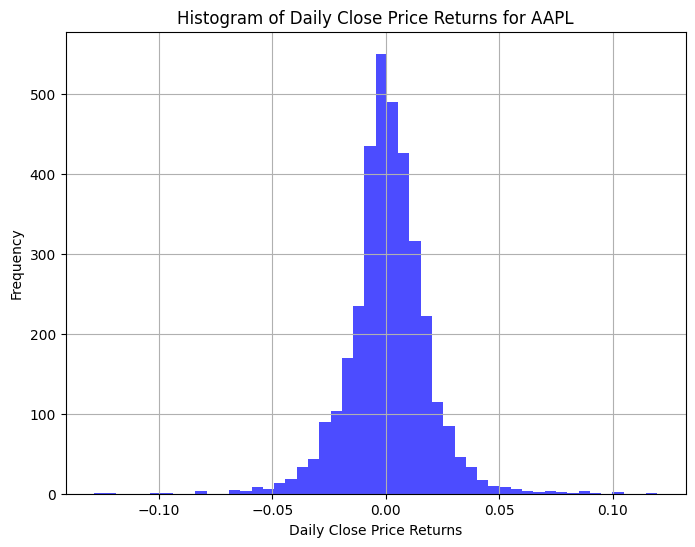

In [8]:
stock_data = stock_datas['AAPL']

returns = stock_data['Close'].pct_change().dropna()
plt.figure(figsize=(8, 6))
plt.hist(returns, bins=50, alpha=0.7, color='blue')
plt.title('Histogram of Daily Close Price Returns for AAPL')
plt.xlabel('Daily Close Price Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

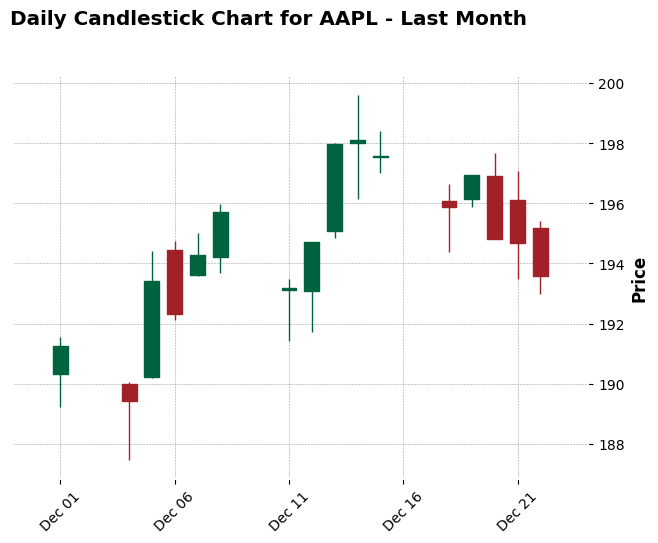

In [9]:
stock_data.reset_index(inplace=True)
stock_data.set_index('Date', inplace=True)

# Downsampling data to daily frequency
daily_data = stock_data.resample('D').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'})

# Filter data for the last month
last_month = daily_data.last('1M')

# Plotting as a Candlestick chart for the last month
mpf.plot(last_month, type='candle', style='charles', title='Daily Candlestick Chart for AAPL - Last Month')

In [10]:
stock_datas = {
    'AAPL': yf.download('AAPL', start='2010-01-01', end='2023-12-19'),
    'MSFT': yf.download('MSFT', start='2010-01-01', end='2023-12-19'),
    'AMZN': yf.download('AMZN', start='2010-01-01', end='2023-12-19'),
    'META': yf.download('META', start='2010-01-01', end='2023-12-19'),
    'GOOGL': yf.download('GOOGL', start='2010-01-01', end='2023-12-19')
}

# Combining all stock data into one DataFrame
combined_data = pd.concat(stock_datas.values(), axis=1, keys=stock_datas.keys())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [11]:
combined_data

AAPL                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2010-01-04    7.622500    7.660714    7.585000    7.643214    6.478997   
2010-01-05    7.664286    7.699643    7.616071    7.656429    6.490201   
2010-01-06    7.656429    7.686786    7.526786    7.534643    6.386965   
2010-01-07    7.562500    7.571429    7.466071    7.520714    6.375157   
2010-01-08    7.510714    7.571429    7.466429    7.570714    6.417542   
...                ...         ...         ...         ...         ...   
2023-12-12  193.080002  194.720001  191.720001  194.710007  194.710007   
2023-12-13  195.089996  198.000000  194.850006  197.960007  197.960007   
2023-12-14  198.020004  199.619995  196.160004  198.110001  198.110001   
2023-12-15  197.529999  198.399994  197.000000  197.570007  197.570007   
2023-12-18  196.089996  196.630005  194.389999  195.889999  195.889999   

                             MSFT                                      ...  \
               Volume        Open        High         Low       Close  ...   
Date                                                                   ...   
2010-01-04  493729600   30.620001   31.100000   30.590000   30.950001  ...   
2010-01-05  601904800   30.850000   31.100000   30.639999   30.959999  ...   
2010-01-06  552160000   30.879999   31.080000   30.520000   30.770000  ...   
2010-01-07  477131200   30.629999   30.700001   30.190001   30.450001  ...   
2010-01-08  447610800   30.280001   30.879999   30.240000   30.660000  ...   
...               ...         ...         ...         ...         ...  ...   
2023-12-12   52696900  370.850006  374.420013  370.459991  374.380005  ...   
2023-12-13   70404200  376.019989  377.640015  370.769989  374.369995  ...   
2023-12-14   66831600  373.309998  373.760010  364.130005  365.929993  ...   
2023-12-15  128256700  366.850006  372.399994  366.279999  370.730011  ...   
2023-12-18   55751900  369.450012  373.000000  368.679993  372.649994  ...   

                  META                                           GOOGL  \
                   Low       Close   Adj Close      Volume        Open   
Date                                                                     
2010-01-04         NaN         NaN         NaN         NaN   15.689439   
2010-01-05         NaN         NaN         NaN         NaN   15.695195   
2010-01-06         NaN         NaN         NaN         NaN   15.662162   
2010-01-07         NaN         NaN         NaN         NaN   15.250250   
2010-01-08         NaN         NaN         NaN         NaN   14.814815   
...                ...         ...         ...         ...         ...   
2023-12-12  324.559998  334.220001  334.220001  18485500.0  131.809998   
2023-12-13  332.640015  334.739990  334.739990  16353300.0  133.380005   
2023-12-14  328.640015  333.170013  333.170013  19607300.0  133.380005   
2023-12-15  331.220001  334.920013  334.920013  30001600.0  131.619995   
2023-12-18  337.019989  344.619995  344.619995  18993900.0  132.630005   

                                                                       
                  High         Low       Close   Adj Close     Volume  
Date                                                                   
2010-01-04   15.753504   15.621622   15.684434   15.684434   78169752  
2010-01-05   15.711712   15.554054   15.615365   15.615365  120067812  
2010-01-06   15.662162   15.174174   15.221722   15.221722  158988852  
2010-01-07   15.265265   14.831081   14.867367   14.867367  256315428  
2010-01-08   15.096346   14.742492   15.065566   15.065566  188783028  
...                ...         ...         ...         ...        ...  
2023-12-12  133.000000  131.259995  132.520004  132.520004   29032800  
2023-12-13  133.500000  131.570007  132.570007  132.570007   30104800  
2023-12-14  133.720001  129.690002  131.940002  131.940002 

In [12]:
combined_data.loc(axis=1)[:,'Close']

AAPL        MSFT        AMZN        META       GOOGL
                 Close       Close       Close       Close       Close
Date                                                                  
2010-01-04    7.643214   30.950001    6.695000         NaN   15.684434
2010-01-05    7.656429   30.959999    6.734500         NaN   15.615365
2010-01-06    7.534643   30.770000    6.612500         NaN   15.221722
2010-01-07    7.520714   30.450001    6.500000         NaN   14.867367
2010-01-08    7.570714   30.660000    6.676000         NaN   15.065566
...                ...         ...         ...         ...         ...
2023-12-12  194.710007  374.380005  147.479996  334.220001  132.520004
2023-12-13  197.960007  374.369995  148.839996  334.739990  132.570007
2023-12-14  198.110001  365.929993  147.419998  333.170013  131.940002
2023-12-15  197.570007  370.730011  149.970001  334.920013  132.600006
2023-12-18  195.889999  372.649994  154.070007  344.619995  135.800003

[3514 rows x 5 columns]

In [13]:
combined_data.fillna(method='ffill', inplace=True)
combined_data.fillna(method='bfill', inplace=True)
combined_data.loc(axis=1)[:,'Close']

AAPL        MSFT        AMZN        META       GOOGL
                 Close       Close       Close       Close       Close
Date                                                                  
2010-01-04    7.643214   30.950001    6.695000   38.230000   15.684434
2010-01-05    7.656429   30.959999    6.734500   38.230000   15.615365
2010-01-06    7.534643   30.770000    6.612500   38.230000   15.221722
2010-01-07    7.520714   30.450001    6.500000   38.230000   14.867367
2010-01-08    7.570714   30.660000    6.676000   38.230000   15.065566
...                ...         ...         ...         ...         ...
2023-12-12  194.710007  374.380005  147.479996  334.220001  132.520004
2023-12-13  197.960007  374.369995  148.839996  334.739990  132.570007
2023-12-14  198.110001  365.929993  147.419998  333.170013  131.940002
2023-12-15  197.570007  370.730011  149.970001  334.920013  132.600006
2023-12-18  195.889999  372.649994  154.070007  344.619995  135.800003

[3514 rows x 5 columns]

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler

My_Tickers_SP500 = ['AAPL', 'MSFT', 'AMZN', 'META', 'GOOGL']  # etc.
historical_data = combined_data

# Define the number of splits for TimeSeriesSplit
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Define window size for the sequences
window_size = 30  # Example window size

# Initialize the lists to hold the input and output sequences for all tickers
X_tickers_sp500 = []
y_tickers_sp500 = []


X_test_sp500 = []
y_test_sp500 = []
test_tickers=[]
# Loop over each ticker to create scaled sequences
for ticker in My_Tickers_SP500:
    # Retrieve the 'Close' prices of the ticker
    close_prices = historical_data[ticker]['Close'].values.reshape(-1, 1)

    # Initialize the scaler
    scaler = MinMaxScaler(feature_range=(0, 1))

    # Split the data using TimeSeriesSplit
    for train_index, test_index in tscv.split(close_prices):
        # Split the data into training and testing
        train_data = close_prices[train_index]
        test_data = close_prices[test_index]

        # Fit the scaler on the training data only
        scaler.fit(train_data)

        # Transform both training and testing data
        train_scaled = scaler.transform(train_data)
        test_scaled = scaler.transform(test_data)

        # train_scaled = train_data
        # test_scaled = test_data

        # Now create the time series sequences for training data
        X_train, y_train = [], []
        for i in range(window_size, len(train_scaled)):
            X_train.append(train_scaled[i-window_size:i, 0])
            y_train.append(train_scaled[i, 0])

        X_test, y_test = [], []
        for i in range(window_size, len(test_scaled)):
            X_test.append(test_scaled[i-window_size:i, 0])
            y_test.append(test_scaled[i, 0])

        test_tickers.append(ticker)
        X_test = np.array(X_test)
        y_test = np.array(y_test)

        # Convert the lists to numpy arrays
        X_train = np.array(X_train)
        y_train = np.array(y_train)

        X_test_sp500.append(X_test)
        y_test_sp500.append(y_test)
        # Store the sequences
        X_tickers_sp500.extend(X_train)
        y_tickers_sp500.extend(y_train)

X_tickers_sp500=np.array(X_tickers_sp500)
y_tickers_sp500=np.array(y_tickers_sp500)

#X_test_sp500=np.array(X_test_sp500)
#y_test_sp500=np.array(y_test_sp500)
# Now, X_tickers_sp500 and y_tickers_sp500 contain the training sequences for each split and ticker
# You can train your model on these sequences


In [ ]:
print(X_tickers_sp500.shape)
print(y_tickers_sp500.shape)

(43225, 30)
(43225,)


In [15]:
seed_value = 221
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
keras.utils.set_random_seed(seed_value)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

def model1():
# Define the LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(window_size, 1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    return model


In [17]:
from tensorflow.keras.layers import GRU

def model2():
    # Define the GRU model
    model = Sequential()
    model.add(GRU(units=50, return_sequences=True, input_shape=(window_size, 1)))
    model.add(GRU(units=50))
    model.add(Dense(1))
    return model

In [18]:
from tensorflow.keras.layers import Bidirectional

def model3():
    # Define the Bi-LSTM model
    model = Sequential()
    model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(window_size, 1)))
    model.add(Bidirectional(LSTM(units=50)))
    model.add(Dense(1))
    return model

In [19]:
from tensorflow.keras.layers import Dense, Flatten

def model4():
    # Define the MLP model
    model = Sequential()
    model.add(Flatten(input_shape=(window_size, 1)))  # Flatten the input sequences
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    return model

In [20]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

def model5():
    # Define the CNN model
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    return model

In [21]:
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Flatten
from tensorflow.keras.models import Sequential

def model6():
    # Define the ConvLSTM model
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, 1)))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    return model

# LSTM

## no scalar

In [ ]:
model1 = model1()

In [ ]:
# Compile the model
model1.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mse', 'mae', 'mape'])
model1.fit(X_tickers_sp500, y_tickers_sp500, epochs=5, batch_size=32)

Epoch 1/5
1351/1351 [==============================] - 17s 9ms/step - loss: 670.9113 - mse: 670.9113 - mae: 9.0174 - mape: 21.7402
Epoch 2/5
1351/1351 [==============================] - 10s 8ms/step - loss: 48.9002 - mse: 48.9002 - mae: 2.0549 - mape: 3.9653
Epoch 3/5
1351/1351 [==============================] - 10s 8ms/step - loss: 76.7170 - mse: 76.7170 - mae: 3.3814 - mape: 7.0690
Epoch 4/5
1351/1351 [==============================] - 17s 13ms/step - loss: 32.6882 - mse: 32.6882 - mae: 2.3205 - mape: 4.9323
Epoch 5/5
1351/1351 [==============================] - 11s 8ms/step - loss: 25.3261 - mse: 25.3261 - mae: 1.8823 - mape: 3.9389


18/18 [==============================] - 1s 3ms/step


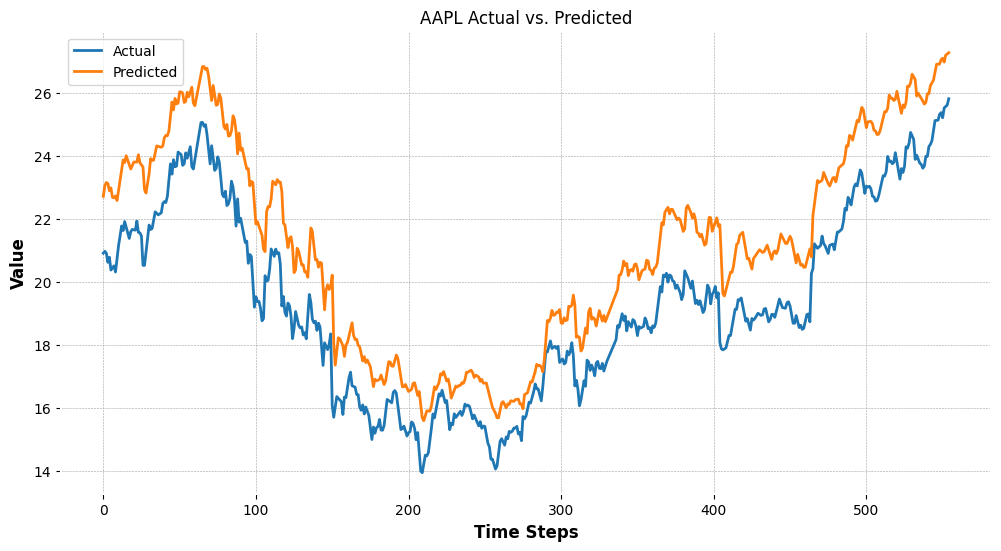

18/18 [==============================] - 0s 3ms/step


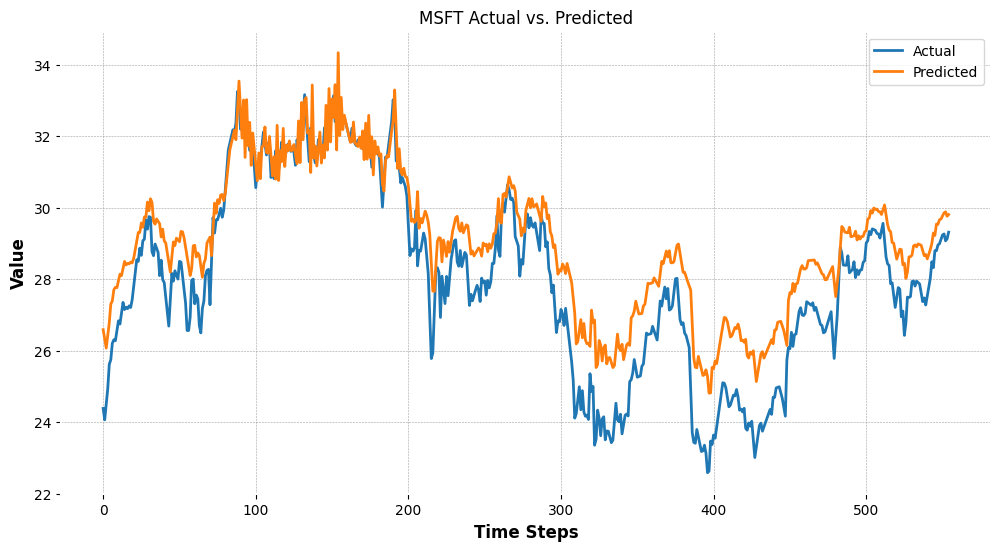

18/18 [==============================] - 0s 3ms/step


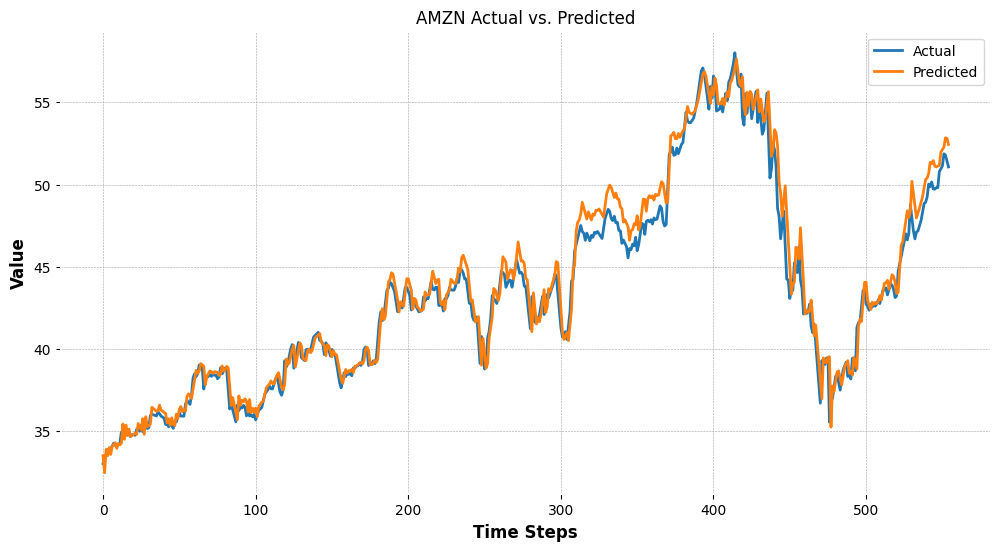

18/18 [==============================] - 0s 3ms/step


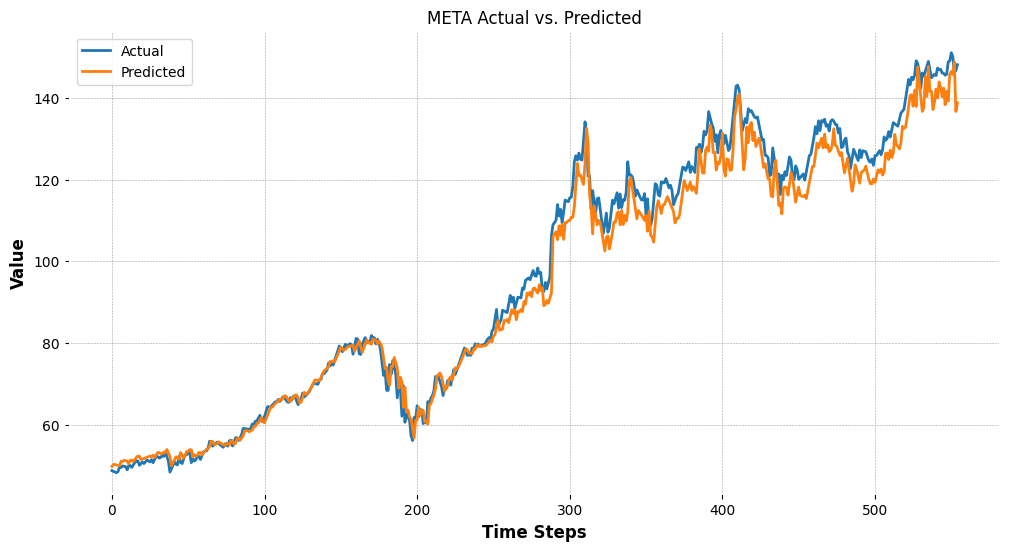

18/18 [==============================] - 0s 3ms/step


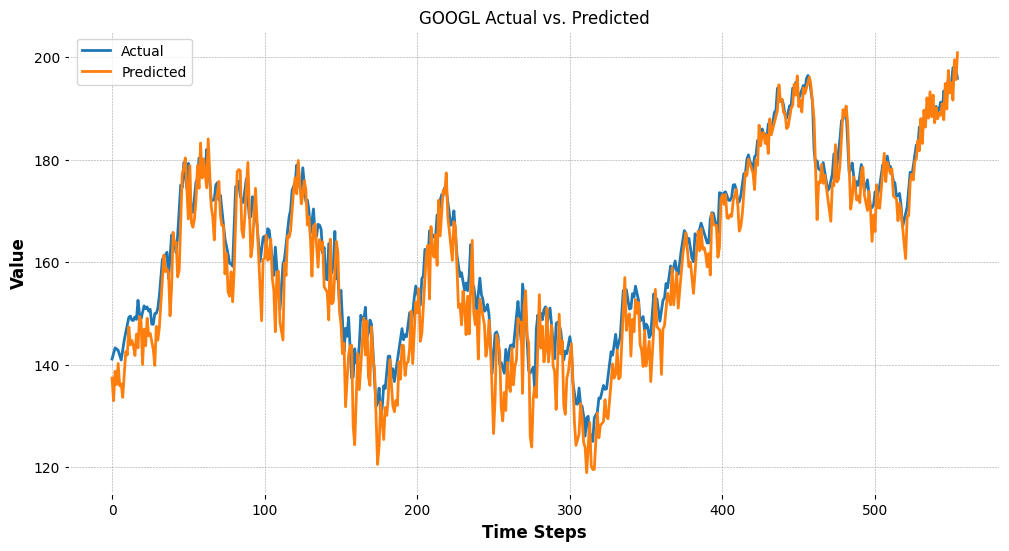

In [ ]:
import matplotlib.pyplot as plt

# Example:
for i in range(len(My_Tickers_SP500)):

    # Evaluate the model on test data
    model1.evaluate(X_test_sp500[i], y_test_sp500[i])

    # Make predictions on the test data
    predictions = model1.predict(X_test_sp500[i])

    # Plot the actual vs. predicted values
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_sp500[i], label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.title(My_Tickers_SP500[i] + ' Actual vs. Predicted')
    plt.xlabel('Time Steps')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


## with scalar

In [22]:
model11 = model1()

In [40]:
# Compile the model
model11.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mse', 'mae'])
model11.fit(X_tickers_sp500, y_tickers_sp500, epochs=5, batch_size=32)

Epoch 1/5
1351/1351 [==============================] - 14s 8ms/step - loss: 2.1233e-04 - mse: 2.1233e-04 - mae: 0.0093
Epoch 2/5
1351/1351 [==============================] - 9s 7ms/step - loss: 2.0628e-04 - mse: 2.0628e-04 - mae: 0.0092
Epoch 3/5
1351/1351 [==============================] - 10s 8ms/step - loss: 2.0766e-04 - mse: 2.0766e-04 - mae: 0.0092
Epoch 4/5
1351/1351 [==============================] - 11s 8ms/step - loss: 1.9794e-04 - mse: 1.9794e-04 - mae: 0.0089
Epoch 5/5
1351/1351 [==============================] - 10s 8ms/step - loss: 2.0008e-04 - mse: 2.0008e-04 - mae: 0.0090


18/18 [==============================] - 1s 3ms/step
mape: 0.04%


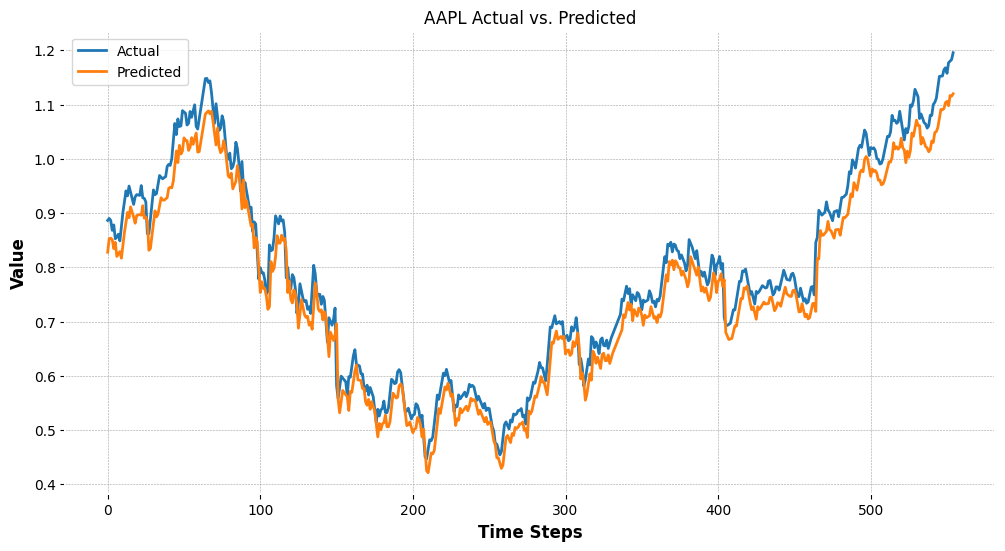

18/18 [==============================] - 0s 3ms/step
mape: 0.05%


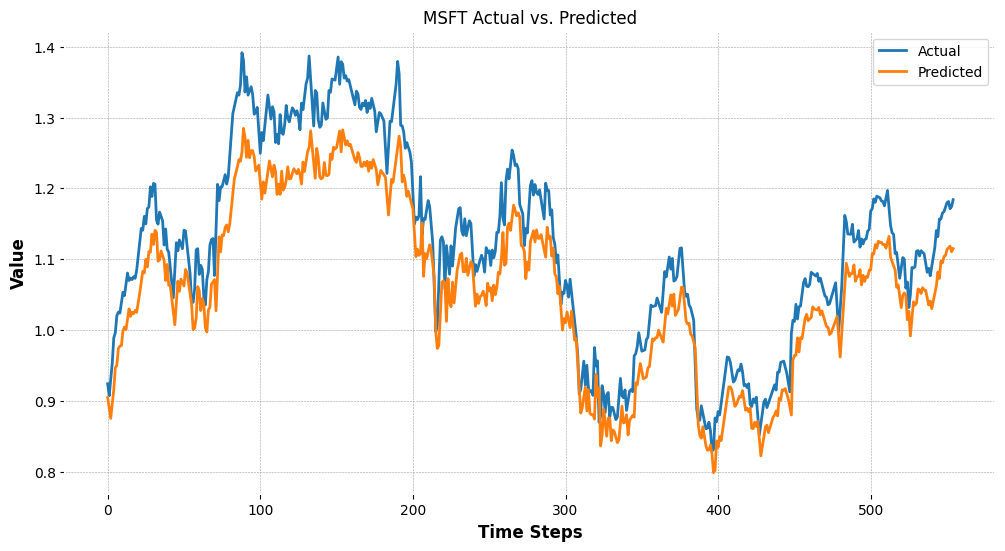

18/18 [==============================] - 0s 3ms/step
mape: 0.08%


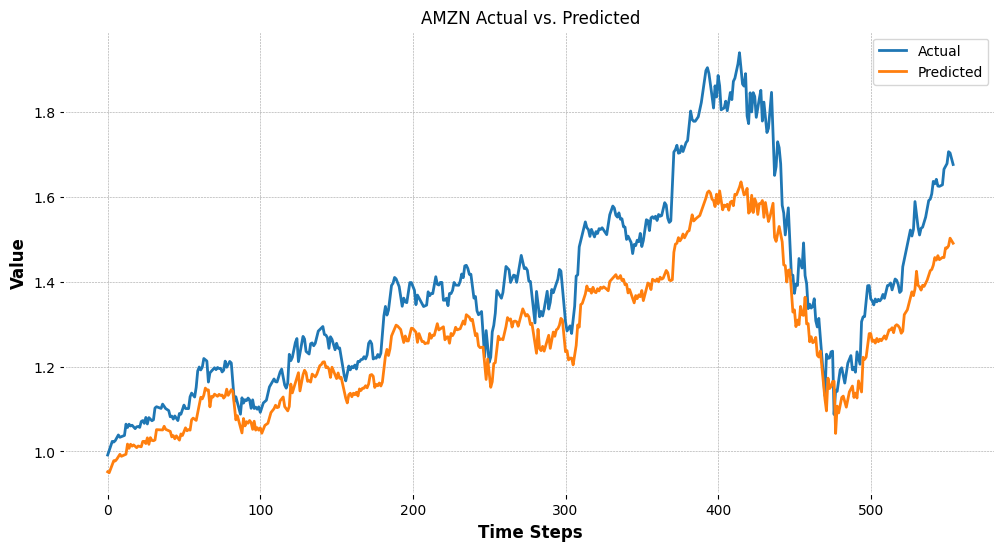

18/18 [==============================] - 0s 3ms/step
mape: 0.14%


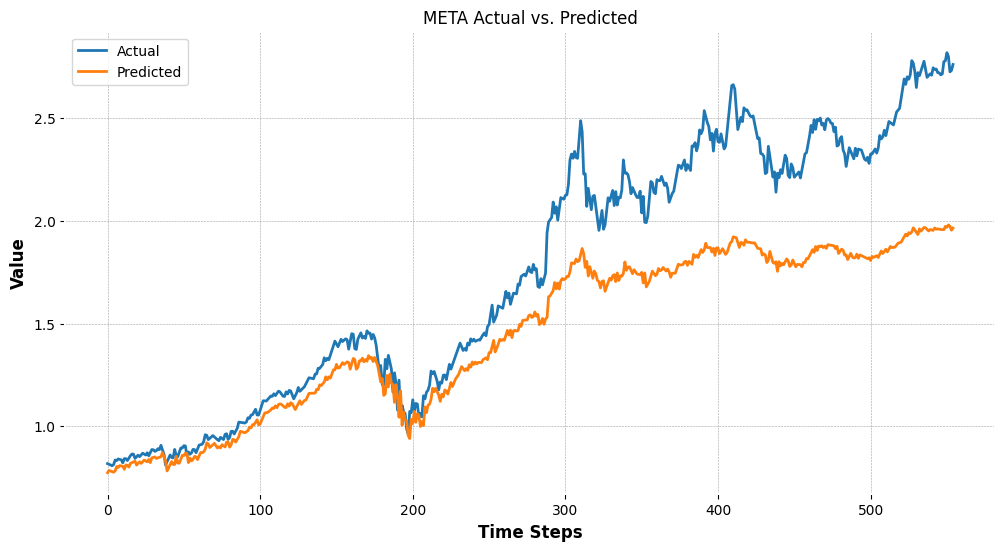

18/18 [==============================] - 0s 4ms/step
mape: 0.05%


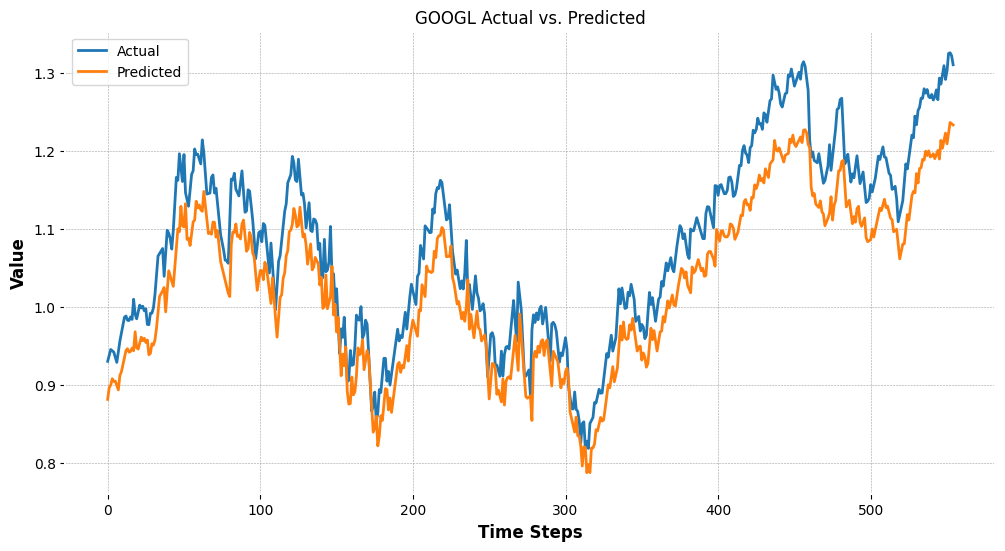

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

# Example:
for i in range(len(My_Tickers_SP500)):

    # Evaluate the model on test data
    model11.evaluate(X_test_sp500[i], y_test_sp500[i])

    # Make predictions on the test data
    predictions = model11.predict(X_test_sp500[i])
    mape = mean_absolute_percentage_error(y_test_sp500[i], predictions)
    print(f"mape: {mape:.2f}%")

    # Plot the actual vs. predicted values
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_sp500[i], label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.title(My_Tickers_SP500[i] + ' Actual vs. Predicted')
    plt.xlabel('Time Steps')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


# GRU

In [37]:
model2 = model2()

In [38]:
# Compile the model
model2.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mse', 'mae'])
model2.fit(X_tickers_sp500, y_tickers_sp500, epochs=5, batch_size=32)

Epoch 1/5
1351/1351 [==============================] - 16s 9ms/step - loss: 4.5581e-04 - mse: 4.5581e-04 - mae: 0.0113
Epoch 2/5
1351/1351 [==============================] - 9s 6ms/step - loss: 2.3970e-04 - mse: 2.3970e-04 - mae: 0.0102
Epoch 3/5
1351/1351 [==============================] - 10s 7ms/step - loss: 2.3666e-04 - mse: 2.3666e-04 - mae: 0.0101
Epoch 4/5
1351/1351 [==============================] - 9s 7ms/step - loss: 2.1329e-04 - mse: 2.1329e-04 - mae: 0.0094
Epoch 5/5
1351/1351 [==============================] - 9s 7ms/step - loss: 2.1620e-04 - mse: 2.1620e-04 - mae: 0.0095


18/18 [==============================] - 1s 4ms/step
mape: 0.02%


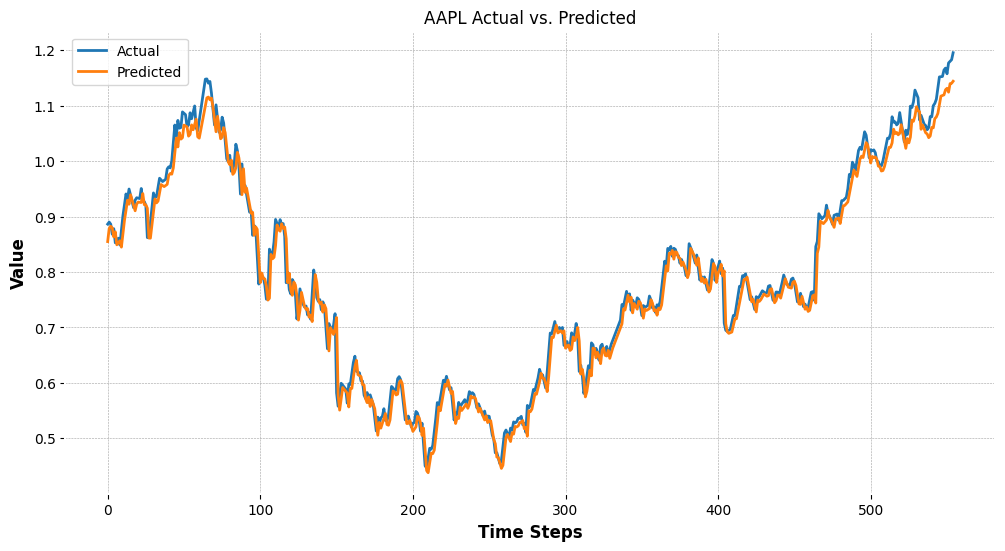

18/18 [==============================] - 0s 4ms/step
mape: 0.03%


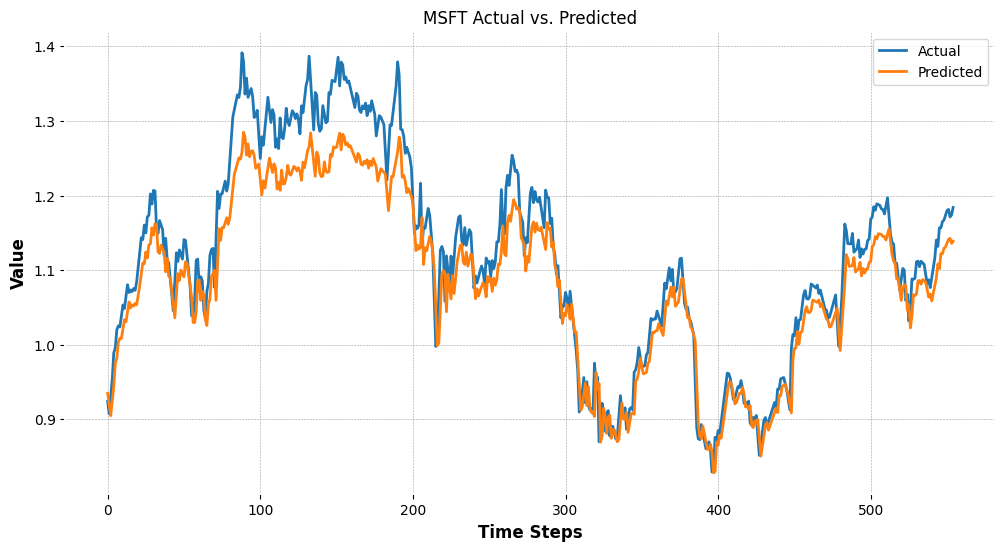

18/18 [==============================] - 0s 4ms/step
mape: 0.08%


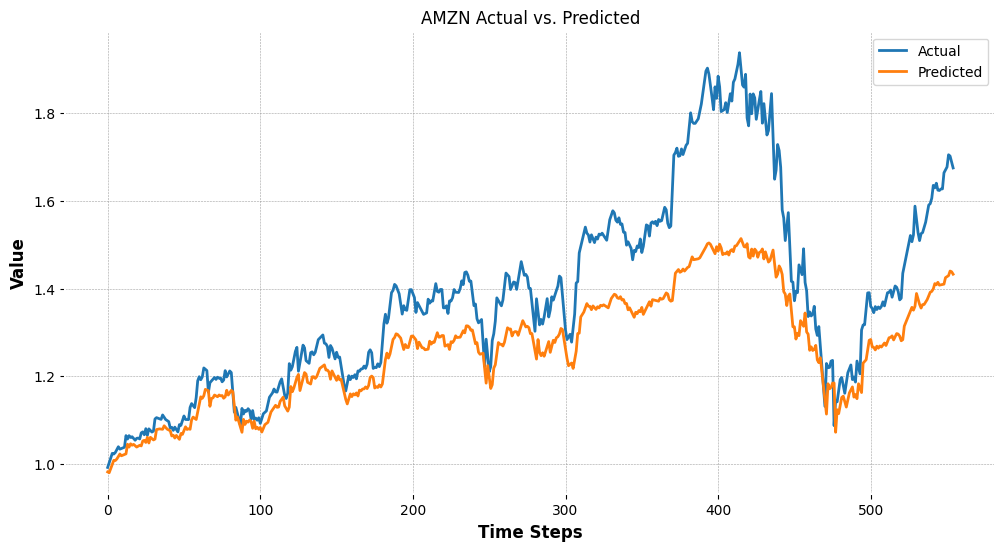

18/18 [==============================] - 0s 3ms/step
mape: 0.18%


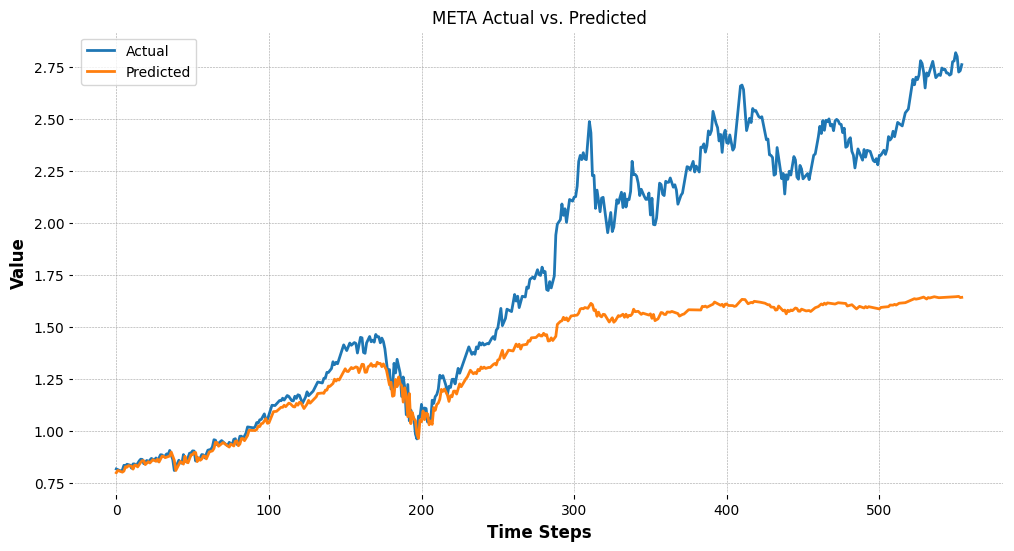

18/18 [==============================] - 0s 3ms/step
mape: 0.03%


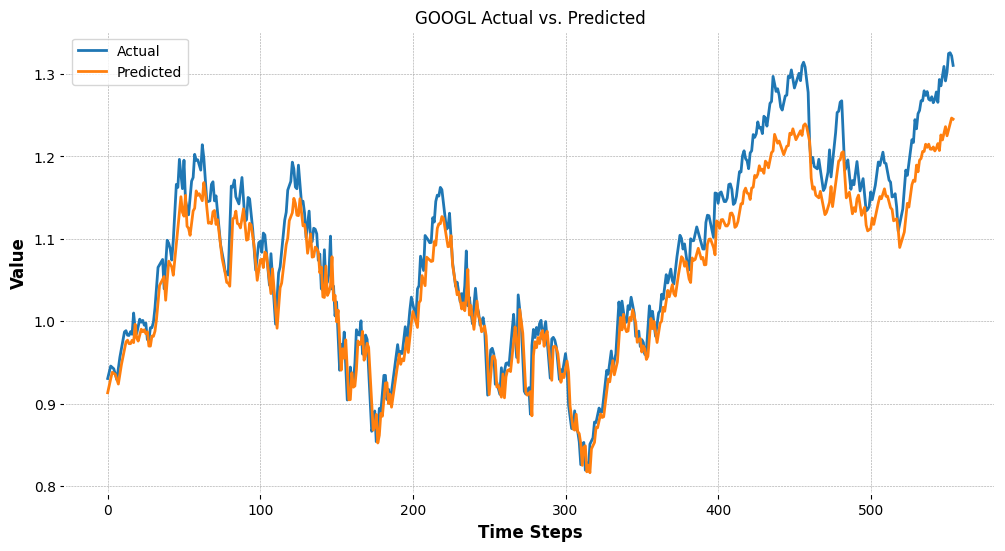

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

# Example:
for i in range(len(My_Tickers_SP500)):

    # Evaluate the model on test data
    model2.evaluate(X_test_sp500[i], y_test_sp500[i])

    # Make predictions on the test data
    predictions = model2.predict(X_test_sp500[i])
    mape = mean_absolute_percentage_error(y_test_sp500[i], predictions)
    print(f"mape: {mape:.2f}%")

    # Plot the actual vs. predicted values
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_sp500[i], label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.title(My_Tickers_SP500[i] + ' Actual vs. Predicted')
    plt.xlabel('Time Steps')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


# Bi-LSTM

In [34]:
model3 = model3()

In [35]:
# Compile the model
model3.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mse', 'mae', 'mape'])
model3.fit(X_tickers_sp500, y_tickers_sp500, epochs=5, batch_size=32)

Epoch 1/5
1351/1351 [==============================] - 23s 12ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0146 - mape: 84348.7891
Epoch 2/5
1351/1351 [==============================] - 16s 12ms/step - loss: 2.1922e-04 - mse: 2.1922e-04 - mae: 0.0095 - mape: 64561.6016
Epoch 3/5
1351/1351 [==============================] - 16s 12ms/step - loss: 2.2694e-04 - mse: 2.2694e-04 - mae: 0.0097 - mape: 67803.4219
Epoch 4/5
1351/1351 [==============================] - 16s 12ms/step - loss: 2.1091e-04 - mse: 2.1091e-04 - mae: 0.0092 - mape: 66713.1094
Epoch 5/5
1351/1351 [==============================] - 17s 13ms/step - loss: 2.1644e-04 - mse: 2.1644e-04 - mae: 0.0095 - mape: 75383.8438


18/18 [==============================] - 1s 5ms/step
mape: 0.02%


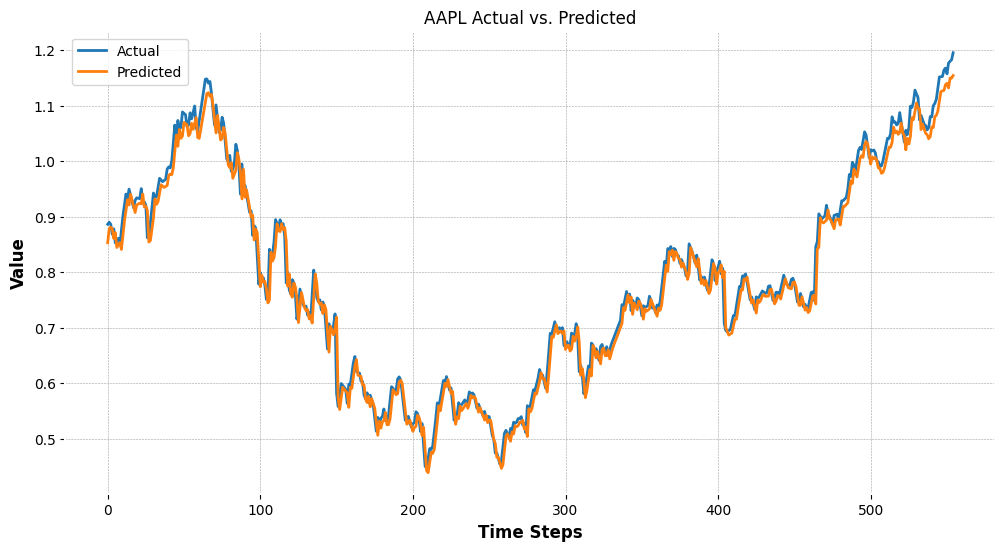

18/18 [==============================] - 0s 5ms/step
mape: 0.03%


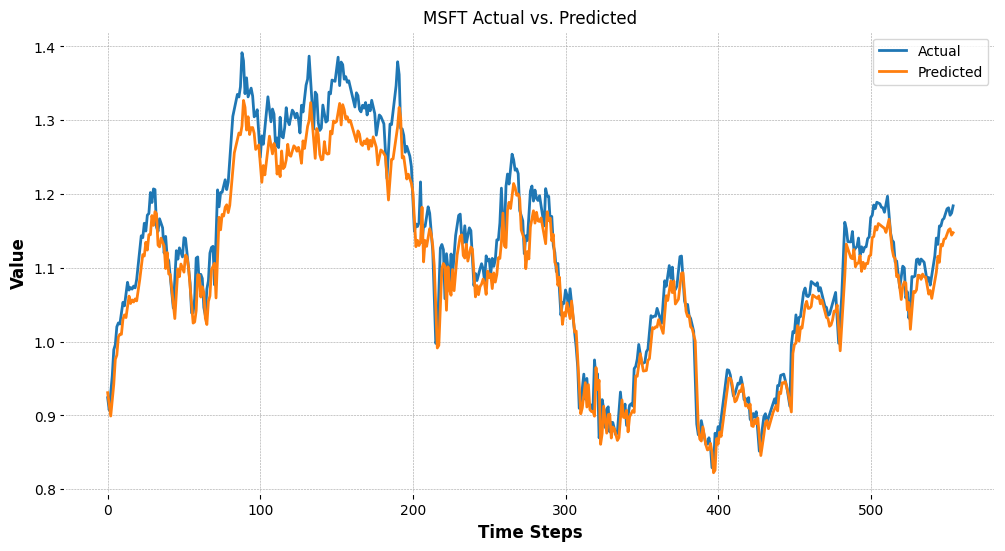

18/18 [==============================] - 0s 5ms/step
mape: 0.05%


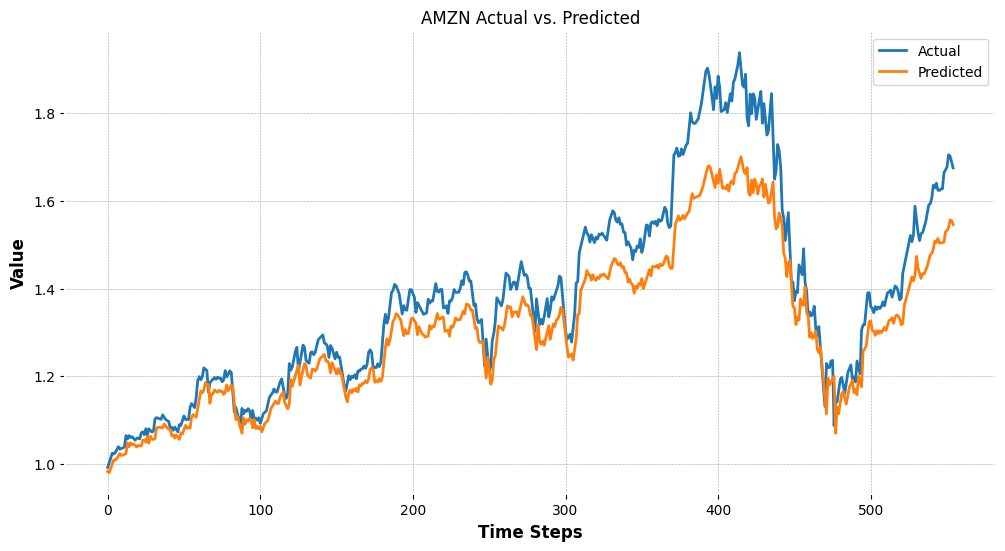

18/18 [==============================] - 0s 5ms/step
mape: 0.11%


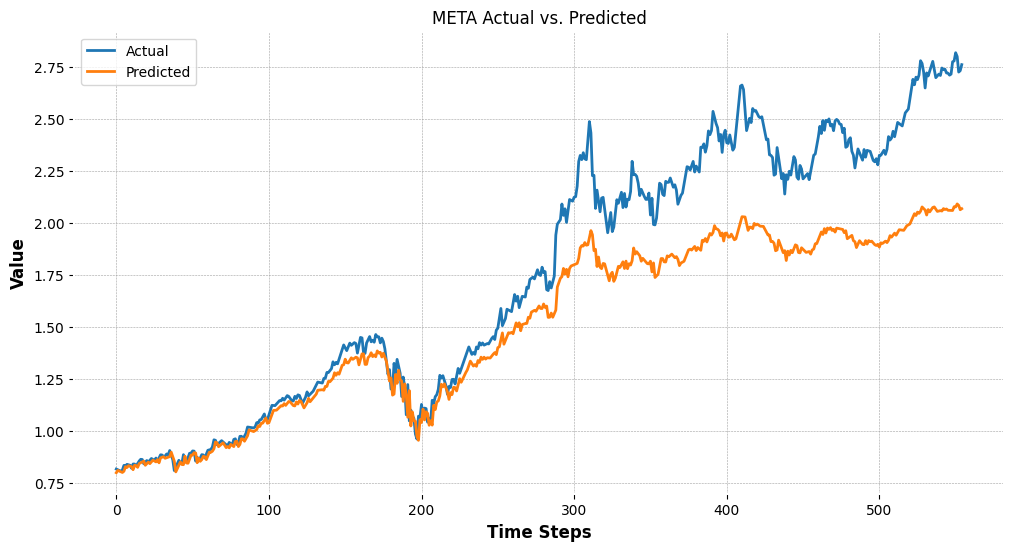

18/18 [==============================] - 0s 7ms/step
mape: 0.02%


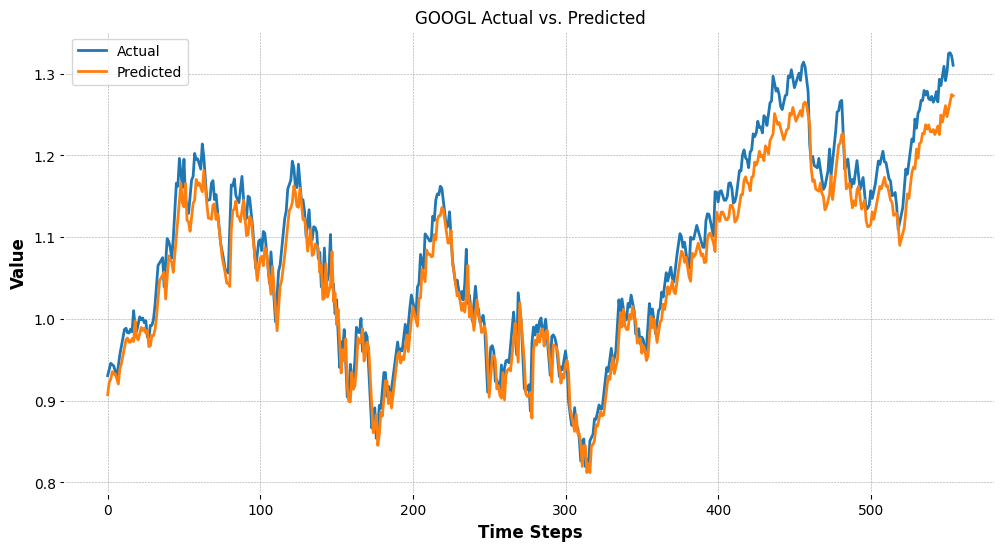

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

# Example:
for i in range(len(My_Tickers_SP500)):

    # Evaluate the model on test data
    model3.evaluate(X_test_sp500[i], y_test_sp500[i])

    # Make predictions on the test data
    predictions = model3.predict(X_test_sp500[i])
    mape = mean_absolute_percentage_error(y_test_sp500[i], predictions)
    print(f"mape: {mape:.2f}%")

    # Plot the actual vs. predicted values
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_sp500[i], label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.title(My_Tickers_SP500[i] + ' Actual vs. Predicted')
    plt.xlabel('Time Steps')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


# MLP

In [31]:
model4 = model4()

In [32]:
# Compile the model
model4.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mse', 'mae'])
model4.fit(X_tickers_sp500, y_tickers_sp500, epochs=5, batch_size=32)

Epoch 1/5
1351/1351 [==============================] - 7s 4ms/step - loss: 8.7590e-04 - mse: 8.7590e-04 - mae: 0.0157
Epoch 2/5
1351/1351 [==============================] - 5s 4ms/step - loss: 3.4783e-04 - mse: 3.4783e-04 - mae: 0.0119
Epoch 3/5
1351/1351 [==============================] - 5s 4ms/step - loss: 3.2824e-04 - mse: 3.2824e-04 - mae: 0.0115
Epoch 4/5
1351/1351 [==============================] - 5s 4ms/step - loss: 2.7380e-04 - mse: 2.7380e-04 - mae: 0.0104
Epoch 5/5
1351/1351 [==============================] - 4s 3ms/step - loss: 2.9073e-04 - mse: 2.9073e-04 - mae: 0.0106


18/18 [==============================] - 0s 2ms/step
mape: 0.04%


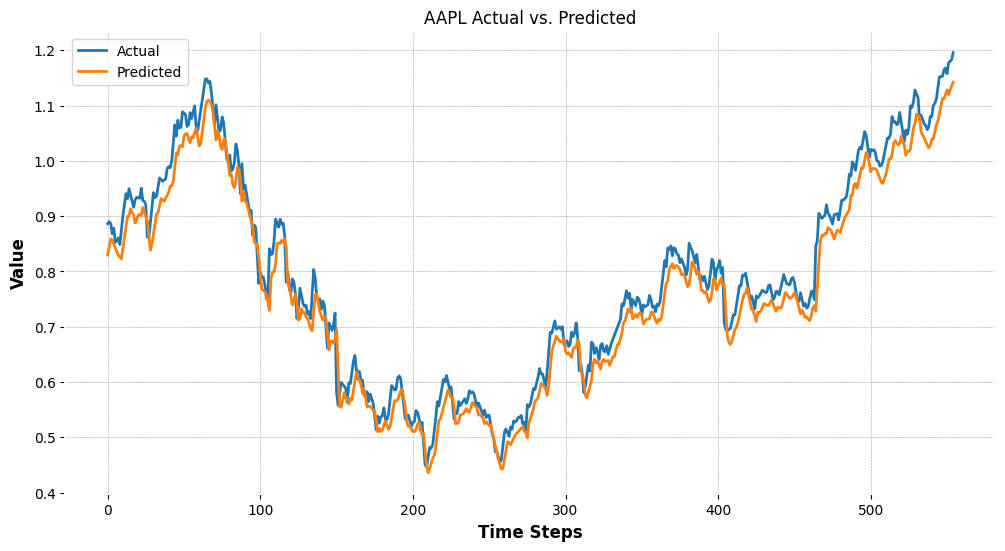

18/18 [==============================] - 0s 2ms/step
mape: 0.04%


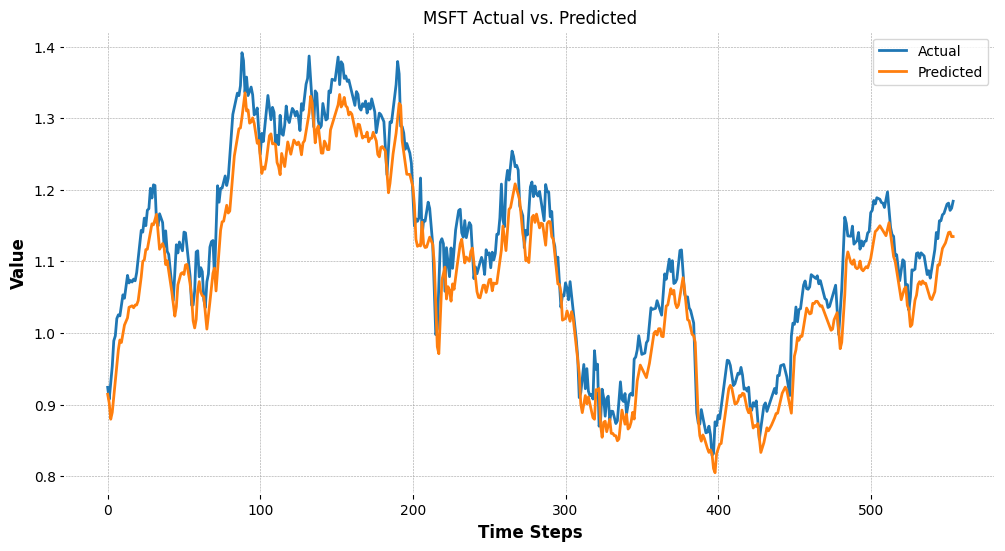

18/18 [==============================] - 0s 2ms/step
mape: 0.04%


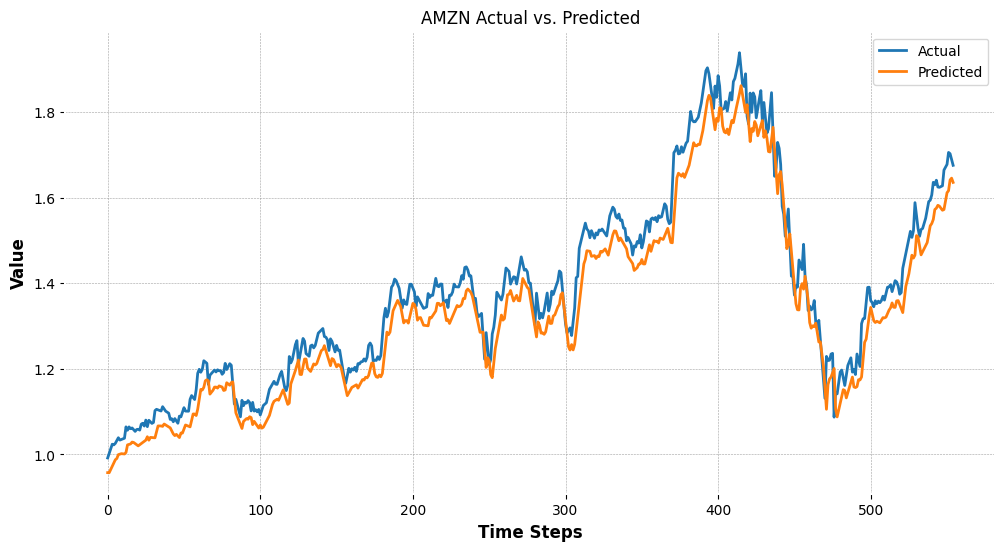

18/18 [==============================] - 0s 2ms/step
mape: 0.04%


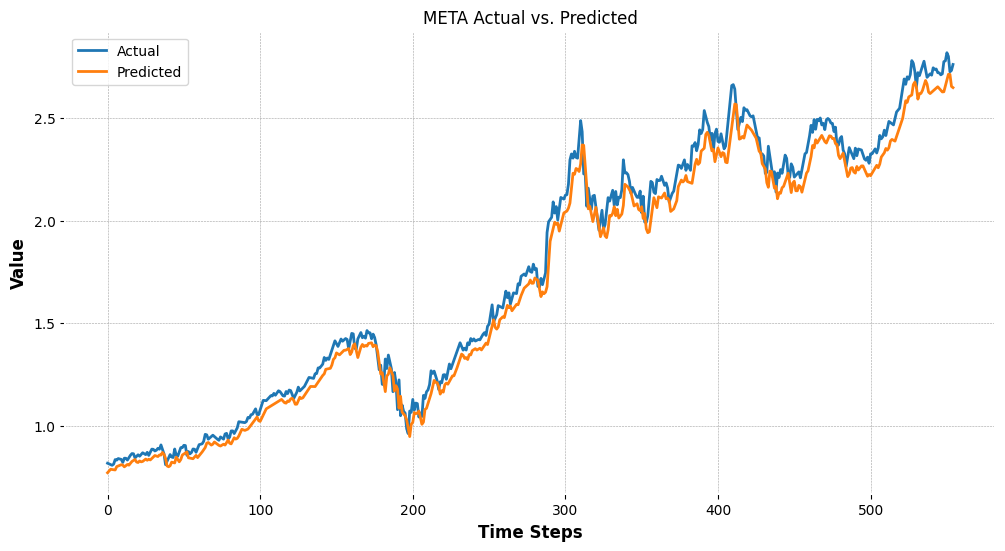

18/18 [==============================] - 0s 2ms/step
mape: 0.03%


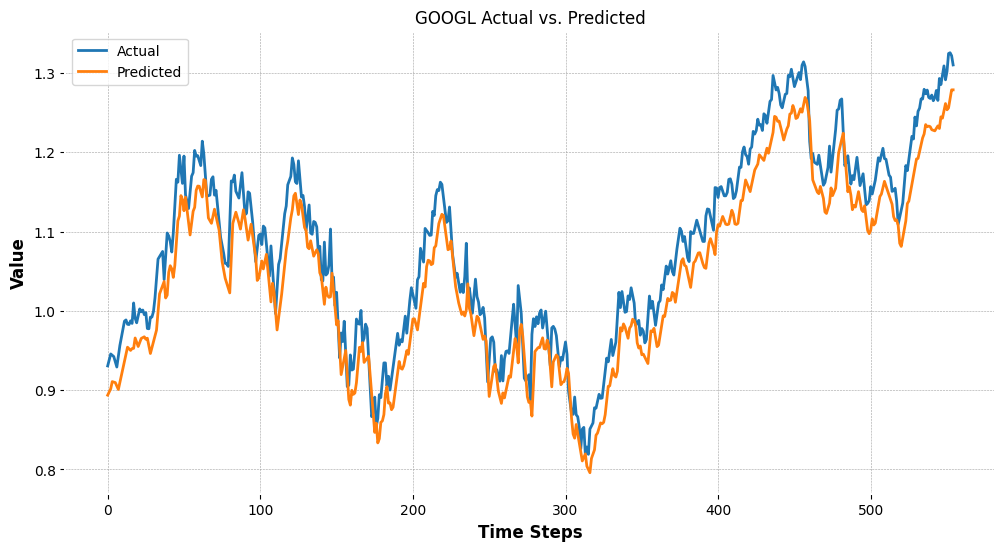

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

# Example:
for i in range(len(My_Tickers_SP500)):

    # Evaluate the model on test data
    model4.evaluate(X_test_sp500[i], y_test_sp500[i])

    # Make predictions on the test data
    predictions = model4.predict(X_test_sp500[i])
    mape = mean_absolute_percentage_error(y_test_sp500[i], predictions)
    print(f"mape: {mape:.2f}%")

    # Plot the actual vs. predicted values
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_sp500[i], label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.title(My_Tickers_SP500[i] + ' Actual vs. Predicted')
    plt.xlabel('Time Steps')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


# CNN

In [28]:
model5 = model5()

In [29]:
# Compile the model
model5.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mse', 'mae'])
model5.fit(X_tickers_sp500, y_tickers_sp500, epochs=5, batch_size=32)

Epoch 1/5
1351/1351 [==============================] - 8s 4ms/step - loss: 9.9597e-04 - mse: 9.9597e-04 - mae: 0.0199
Epoch 2/5
1351/1351 [==============================] - 7s 5ms/step - loss: 5.1563e-04 - mse: 5.1563e-04 - mae: 0.0150
Epoch 3/5
1351/1351 [==============================] - 5s 4ms/step - loss: 4.9722e-04 - mse: 4.9722e-04 - mae: 0.0148
Epoch 4/5
1351/1351 [==============================] - 8s 6ms/step - loss: 4.1107e-04 - mse: 4.1107e-04 - mae: 0.0135
Epoch 5/5
1351/1351 [==============================] - 6s 4ms/step - loss: 3.6744e-04 - mse: 3.6744e-04 - mae: 0.0127


18/18 [==============================] - 0s 2ms/step


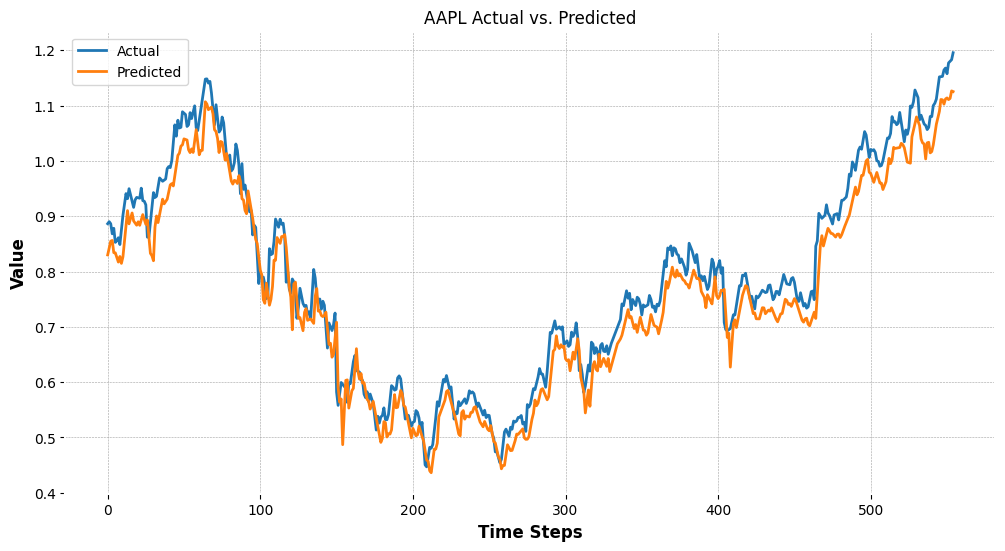

18/18 [==============================] - 0s 2ms/step


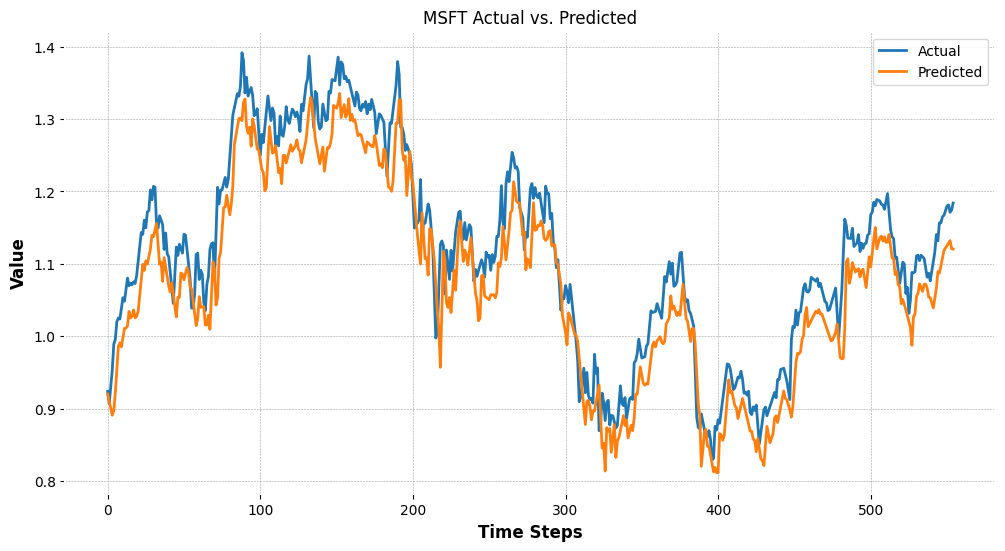

18/18 [==============================] - 0s 2ms/step


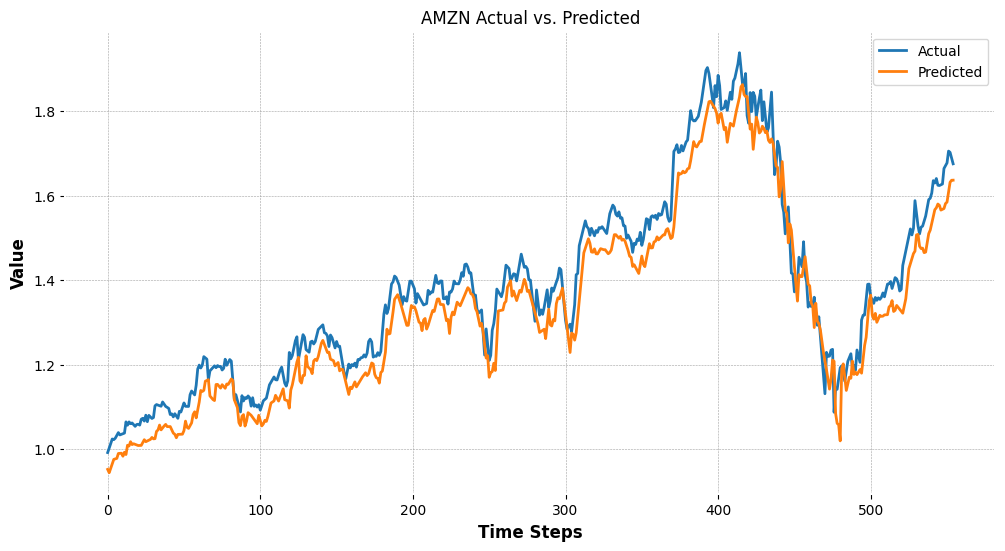

18/18 [==============================] - 0s 2ms/step


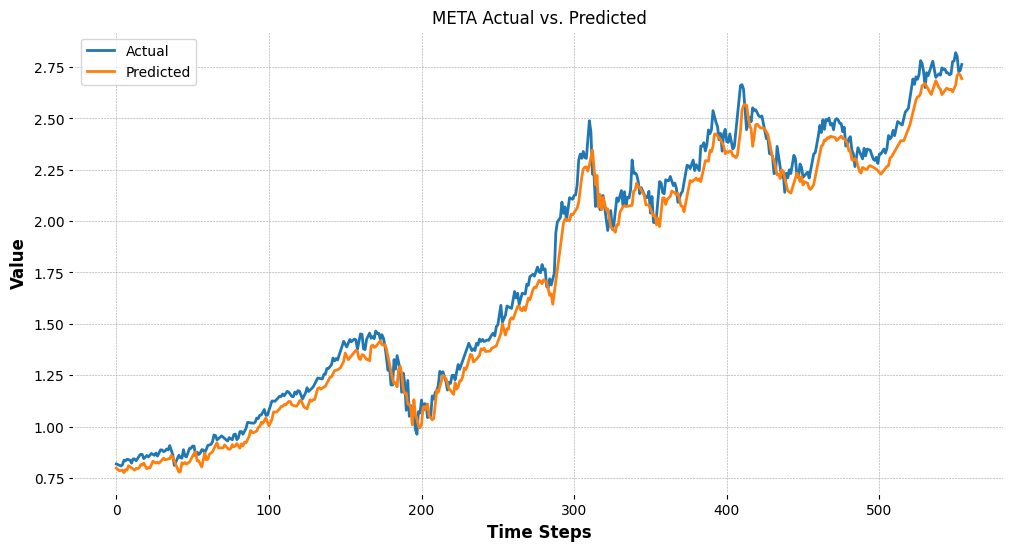

18/18 [==============================] - 0s 2ms/step


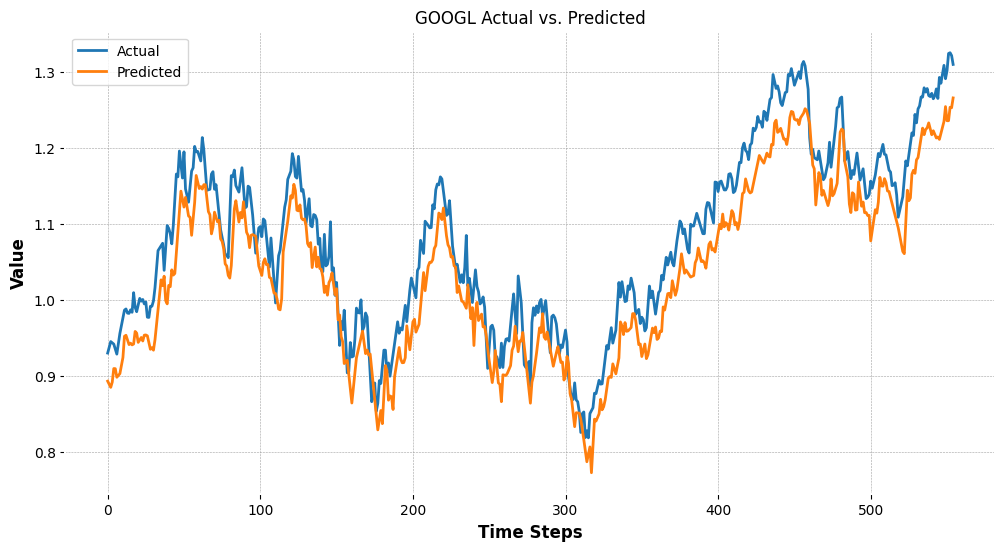

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

# Example:
for i in range(len(My_Tickers_SP500)):

    # Evaluate the model on test data
    model5.evaluate(X_test_sp500[i], y_test_sp500[i])

    # Make predictions on the test data
    predictions = model5.predict(X_test_sp500[i])
    mape = mean_absolute_percentage_error(y_test_sp500[i], predictions)
    print(f"mape: {mape:.2f}%")
    # Plot the actual vs. predicted values
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_sp500[i], label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.title(My_Tickers_SP500[i] + ' Actual vs. Predicted')
    plt.xlabel('Time Steps')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


# Conv-LSTM

In [24]:
model6 = model6()

In [26]:
# Compile the model
model6.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mse', 'mae'])
model6.fit(X_tickers_sp500, y_tickers_sp500, epochs=5, batch_size=32)

Epoch 1/5
1351/1351 [==============================] - 12s 6ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0220
Epoch 2/5
1351/1351 [==============================] - 8s 6ms/step - loss: 3.0418e-04 - mse: 3.0418e-04 - mae: 0.0117
Epoch 3/5
1351/1351 [==============================] - 8s 6ms/step - loss: 3.1596e-04 - mse: 3.1596e-04 - mae: 0.0118
Epoch 4/5
1351/1351 [==============================] - 9s 7ms/step - loss: 3.0826e-04 - mse: 3.0826e-04 - mae: 0.0116
Epoch 5/5
1351/1351 [==============================] - 8s 6ms/step - loss: 2.9177e-04 - mse: 2.9177e-04 - mae: 0.0114


18/18 [==============================] - 0s 3ms/step
mape: 0.04%


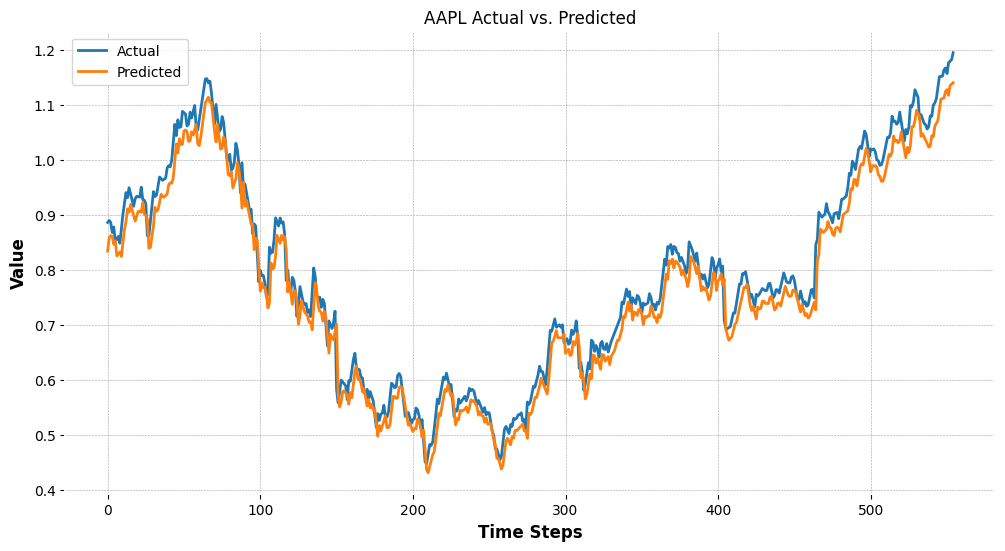

18/18 [==============================] - 0s 4ms/step
mape: 0.04%


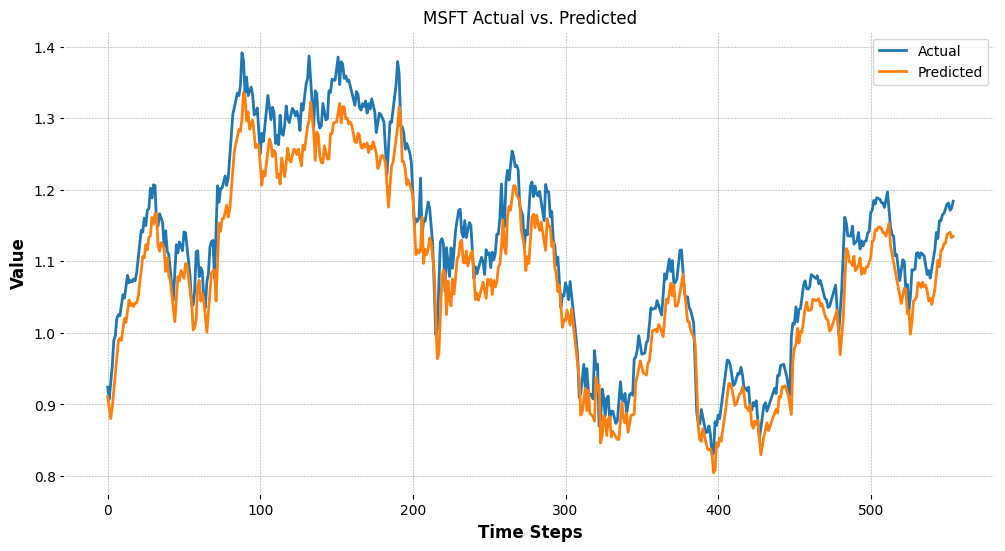

18/18 [==============================] - 0s 4ms/step
mape: 0.05%


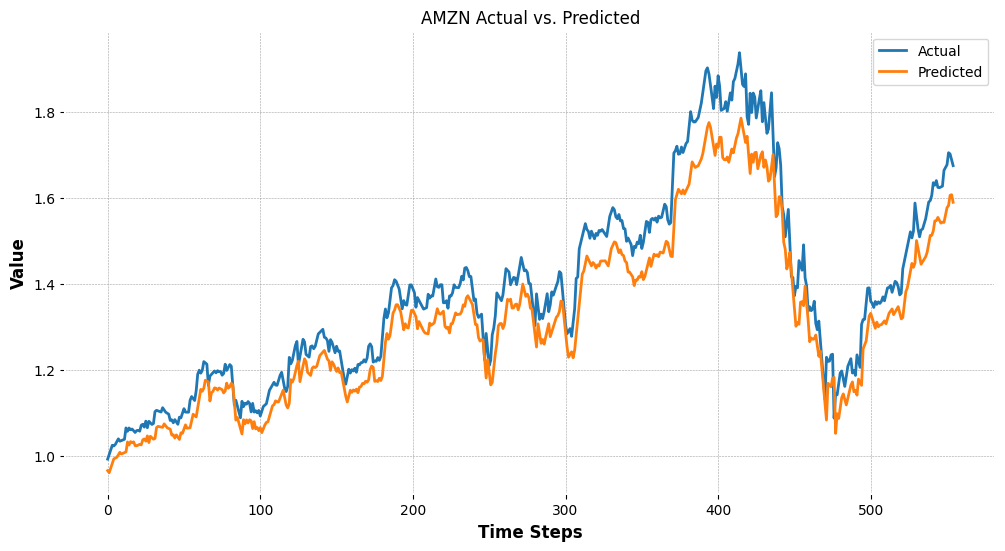

18/18 [==============================] - 0s 4ms/step
mape: 0.08%


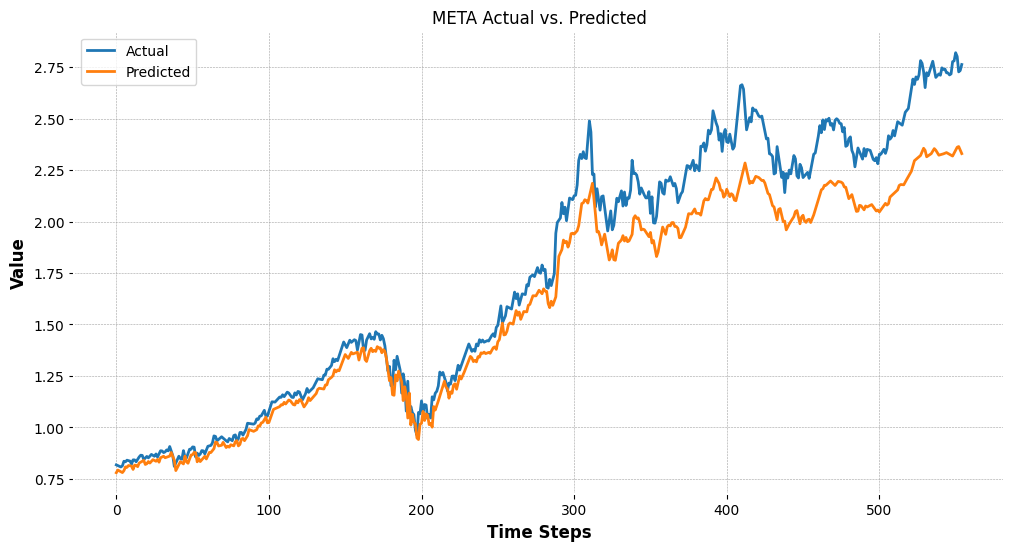

18/18 [==============================] - 0s 5ms/step
mape: 0.03%


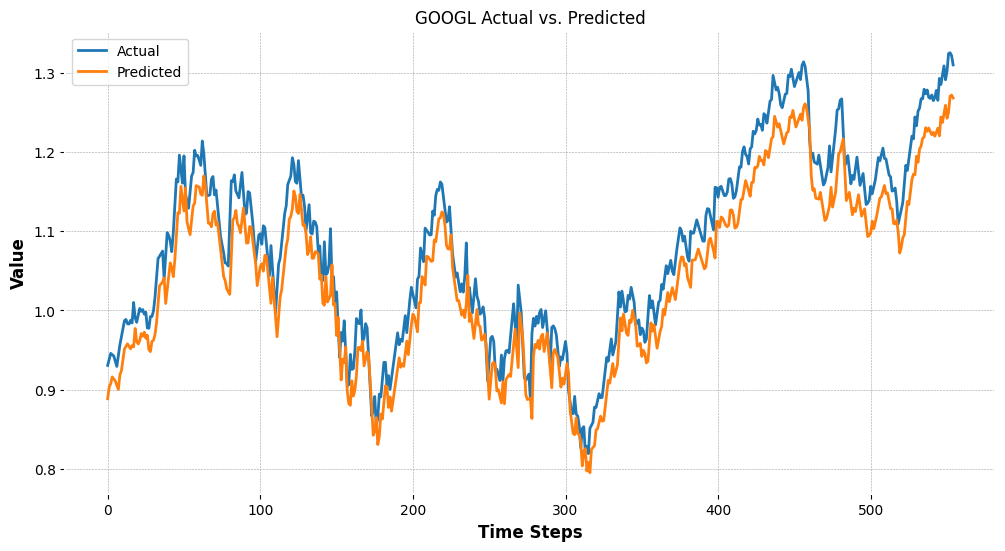

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

# Example:
for i in range(len(My_Tickers_SP500)):

    # Evaluate the model on test data
    model6.evaluate(X_test_sp500[i], y_test_sp500[i])

    # Make predictions on the test data
    predictions = model6.predict(X_test_sp500[i])
    mape = mean_absolute_percentage_error(y_test_sp500[i], predictions)
    print(f"mape: {mape:.2f}%")

    # Plot the actual vs. predicted values
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_sp500[i], label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.title(My_Tickers_SP500[i] + ' Actual vs. Predicted')
    plt.xlabel('Time Steps')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


# naive forecast

mse: 0.000571 - mae: 0.014663 - mape: 0.02%


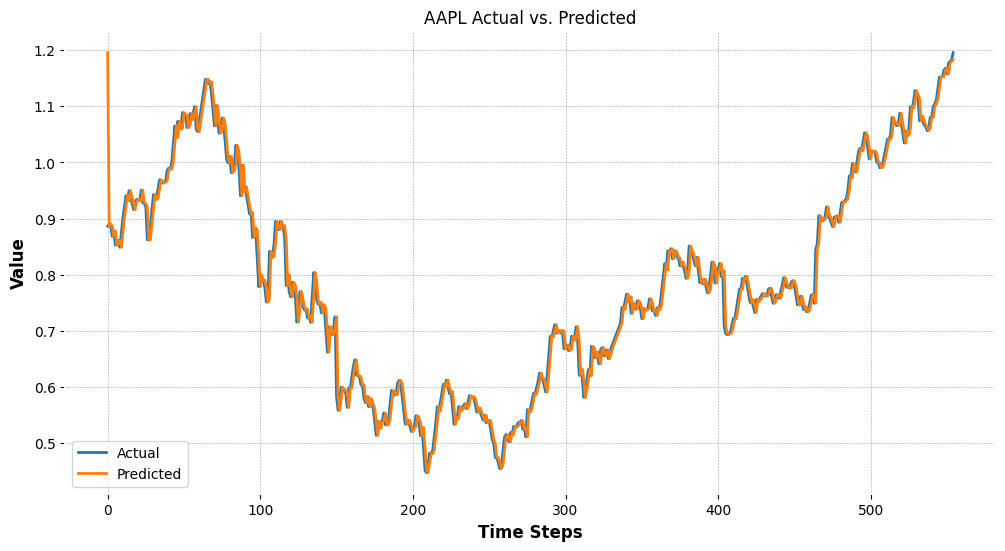

mse: 0.000639 - mae: 0.017154 - mape: 0.02%


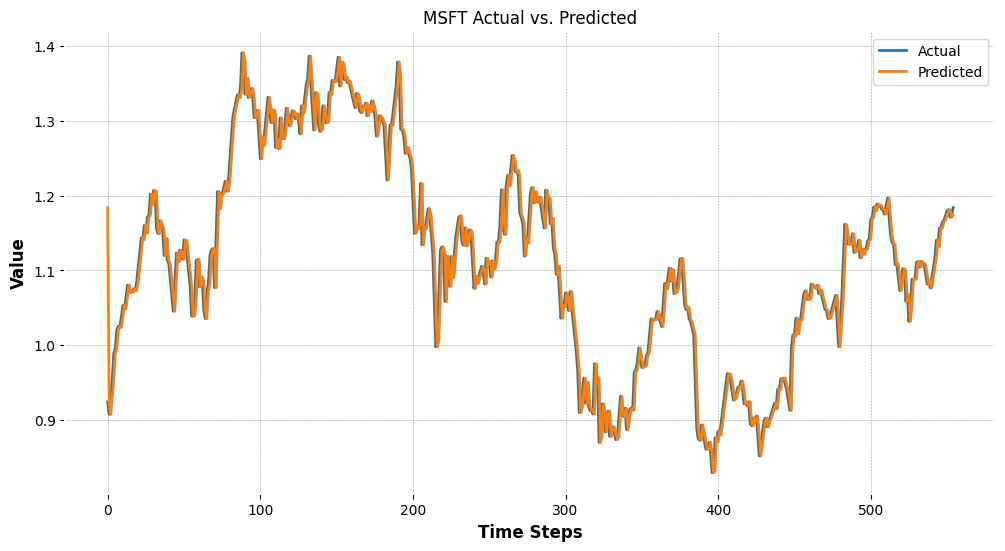

mse: 0.001533 - mae: 0.019084 - mape: 0.01%


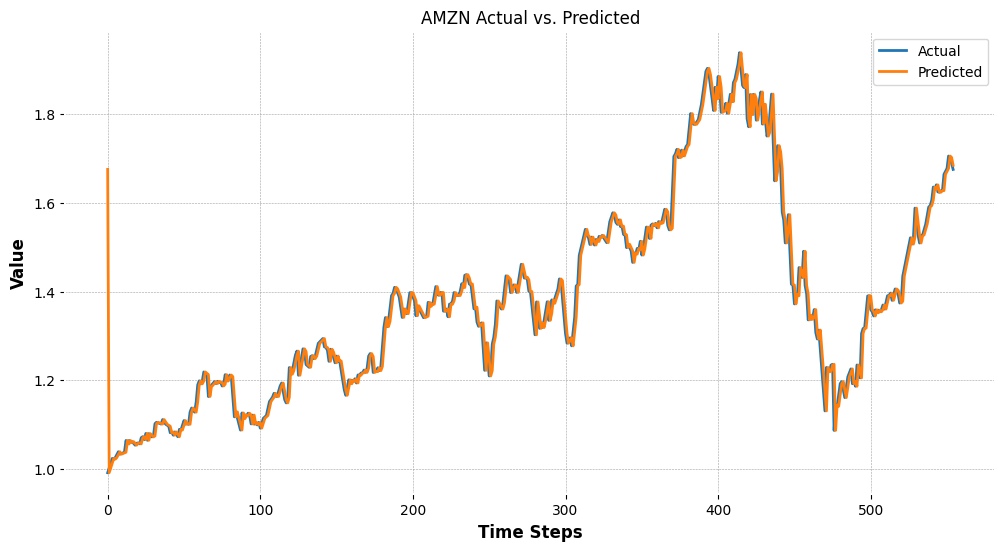

mse: 0.008564 - mae: 0.032523 - mape: 0.02%


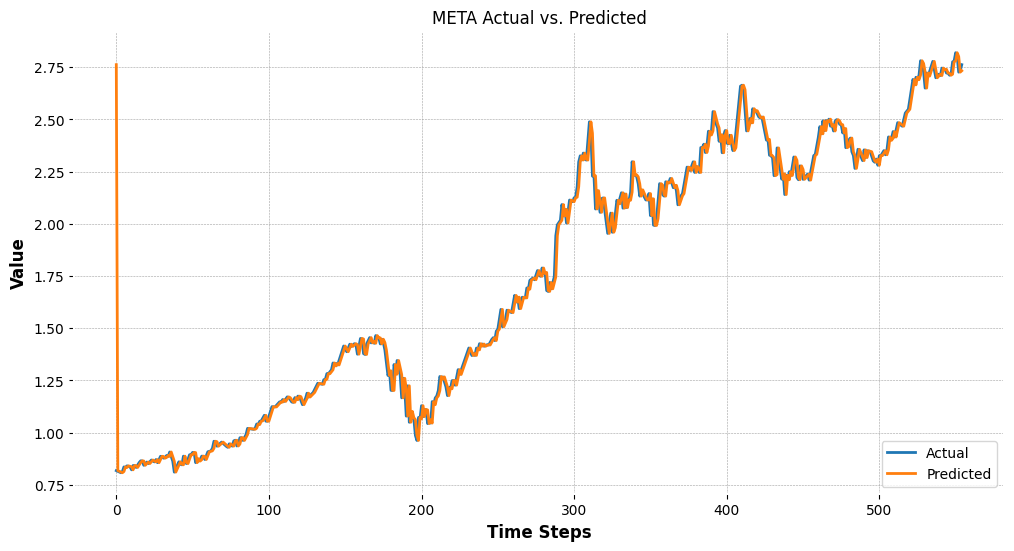

mse: 0.000646 - mae: 0.015542 - mape: 0.01%


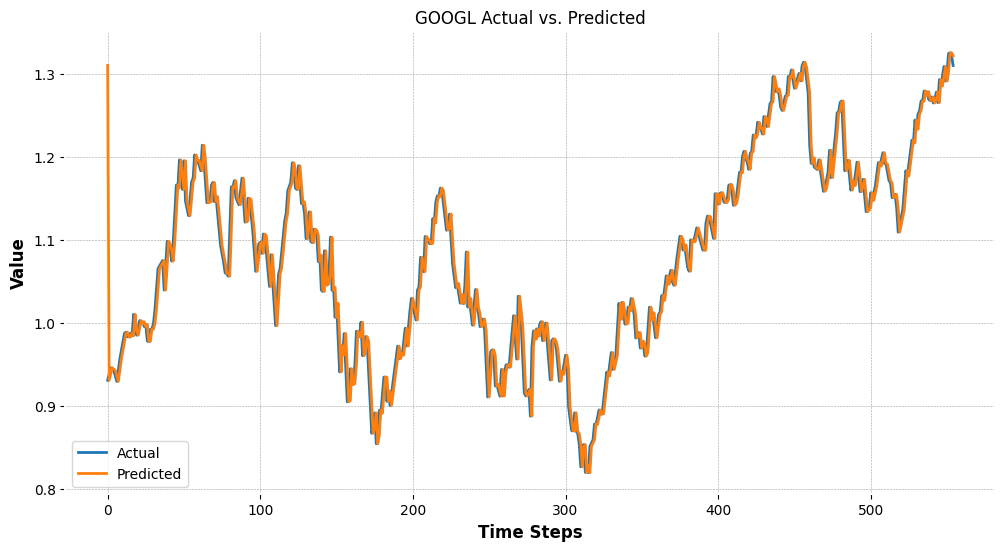

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

for i in range(len(My_Tickers_SP500)):
    # Shift the true values by one time step
    predictions = np.roll(y_test_sp500[i], shift=1)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test_sp500[i], predictions)
    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test_sp500[i], predictions)
    # Calculate Mean Absolute Percentage Error (MAPE)
    mape = mean_absolute_percentage_error(y_test_sp500[i], predictions)

    print(f"mse: {mse:.6f} - mae: {mae:.6f} - mape: {mape:.2f}%")

    # Plot the actual vs. predicted values
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_sp500[i], label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.title(My_Tickers_SP500[i] + ' Actual vs. Predicted')
    plt.xlabel('Time Steps')
    plt.ylabel('Value')
    plt.legend()
    plt.show()